# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   [Double click on this cell to edit]


3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascienceandmachinelearning
/` with a local path of your choice
   > 2. replace (https://github.com/LIS2ndyear/datascienceandmachinelearning/tree/main/summative) with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**


This analysis examines student attendance patterns across different modules.

The dataset contains individual student attendance records for the various modules over the academic years 2023-2025.

The main research question are: **How does attendance vary across modules, and what patterns exists in which students attend which modules?**


### 2.1 Data Loading 


In [100]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [101]:
# Load dataset `attendance_anonymised.csv` using `pandas`.
df = pd.read_csv('attendance_anonymised-1.csv')

The dataset contains 17,053 attendance records from 498 students across multiple modules from 2023-2025.

In [102]:
# Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.
# Display first few rows of dataframe
df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


In [103]:
# Check data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

The dataset contains 17,053 attendance records, 15 columns including student identifiers, module details, dates and attendance metrics. Most columns have complete data. However, two columns have minor missing values is Positive and Usage Code; both have 15 missing values.

These 15 missing values represent <1% of the records and so removing them will not signficantly impact the findings

In [104]:
# Check summary statistics
df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


Students IDs range from 1 to 498. Module attendance (Positive Marks).

The columns are renamed in the next section but a quick interpretation of the data.
- Most of the records span from 2023 (Calocc Code average 2023.91)

- 71.7% of students attended (Positive Marks Mean)
- The Positive marks is made up of binary matrix - 0 (did not attend) and 1 (did attend)
- 25th percentile = 0 - this means 25% of records are absences
- 75th percentile = 1 - this means most records show attendance
- The standard deviation is 0.45, which suggests variability in attendance patterns.

### 2.2 Data Cleaning

To clean the data this will involve the removal of unnecessary columns, renaming them for clarity and converting the datetime format.

In [105]:
# Drop the `Planned End Date` column as not relevant for analysis
df = df.drop(['Planned End Date'], axis=1)

# Check this column has been dropped
df.columns 

Index(['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname',
       'Forename', 'Long Description', 'Register Event ID', 'Object ID',
       'Register Event Slot ID', 'Planned Start Date', 'is Positive',
       'Postive Marks', 'Negative Marks', 'Usage Code'],
      dtype='object')

The Planned End Date colum is removed as it is not relevant to this analysis. The analysis will focus on attendance patterns overtime, so the end date will not provide any additional information or value.

Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [106]:
# Rename colums for consistency
df = df.rename(columns={
    'Person Code' : 'Person Code',
    'Unit Instance Code' : 'Module Code',
    'Calocc Code' : 'Year',
    'Surname' : 'Surname',
    'Forename': 'Forename',
    'Long Description' : 'Module Name',
    'Register Event ID' : 'Event Slot ID',
    'Object ID' : 'Object ID',
    'Planned Start Date' : 'Date',
    'is Positive' : 'Has Attended',
    'Postive Marks' : 'Attended',
    'Negative Marks' : 'NotAttended',
    'Usage Code' : 'Attendance Code',
})

In [107]:
# Check updated columns
df.columns

Index(['Person Code', 'Module Code', 'Year', 'Surname', 'Forename',
       'Module Name', 'Event Slot ID', 'Object ID', 'Register Event Slot ID',
       'Date', 'Has Attended', 'Attended', 'NotAttended', 'Attendance Code'],
      dtype='object')

In [108]:
# Convert `Date` to a pandas timestamp for appropriate date time format 
df['Date'] = pd.to_datetime(df['Date'])

# Check correct format
df['Date'].head()

0   2025-04-03
1   2023-11-03
2   2024-07-03
3   2024-10-09
4   2023-12-27
Name: Date, dtype: datetime64[ns]

### 2.3 Exploratory Data Analysis

In [109]:
# Display all unique module names
print(df['Module Name'].unique())

['Nursing' 'Italian' 'History' 'Arabic' 'Database Design' 'Spanish'
 'Journalism' 'International Business' 'Project Management' 'Algorithms'
 'System Administration' 'Public Speaking' 'Cloud Computing'
 'English Literature' 'Cybersecurity' 'Discrete Mathematics' 'Linguistics'
 'French' 'Music Theory' 'Religious Studies' 'Marketing'
 'User Experience Design' 'Theater' 'Biology' 'Statistics' 'Nutrition'
 'Chemistry' 'Linear Algebra' 'Leadership' 'Biomedical Engineering'
 'Digital Systems' 'Political Science' 'Arts & Crafts'
 'Occupational Therapy' 'Quality Assurance' 'Ethics' 'Creative Writing'
 'Information Technology' 'Graphic Design' 'Data Science'
 'Web Development' 'Japanese' 'Data Analysis' 'Epidemiology' 'Geography'
 'Medicine' 'Strategic Planning' 'Pharmacy' 'Business Intelligence'
 'Demographics']


This dataset contains 50 modules, from STEM subjects, Humanities, Business, Health science and Languages.

In [110]:
# Filter the DataFrame on for one specific module - cybersecurity 
my_module = 'Cybersecurity' 

I selected Cybersecurity as the example module because it represents a core technical subject, it has significant entrollment for meaningful analysis and it shows variation in attendance pattern over time.

In [111]:
# Filter for this module
module_df = df[df['Module Name'] == my_module].copy()

In [112]:
# Make sure 'Date' is in the datetime format
module_df['Date'] = pd.to_datetime(module_df['Date'])

To further explore attendance patterns, the mean daily attendance rate was calculated for Cybersecurity.

In [113]:
# Calculate average attendance per day
# The attended column is binary (1 for attended, 0 for not attended)
# Calculating the mean will give the attendance rate
attendance_over_time = module_df.groupby('Date')['Attended'].mean()
# Check the results
attendance_over_time.head

<bound method NDFrame.head of Date
2023-03-19    1.000000
2023-05-25    0.937500
2023-07-31    1.000000
2023-08-12    1.000000
2023-10-24    0.875000
2024-03-19    0.937500
2024-04-14    1.000000
2024-04-20    1.000000
2024-05-02    0.875000
2024-05-04    0.882353
2024-05-19    1.000000
2024-10-08    1.000000
2025-03-27    0.875000
2025-04-03    1.000000
2025-04-24    1.000000
2025-05-04    1.000000
2025-05-14    1.000000
2025-06-19    1.000000
2025-07-17    0.937500
2025-08-12    0.812500
Name: Attended, dtype: float64>

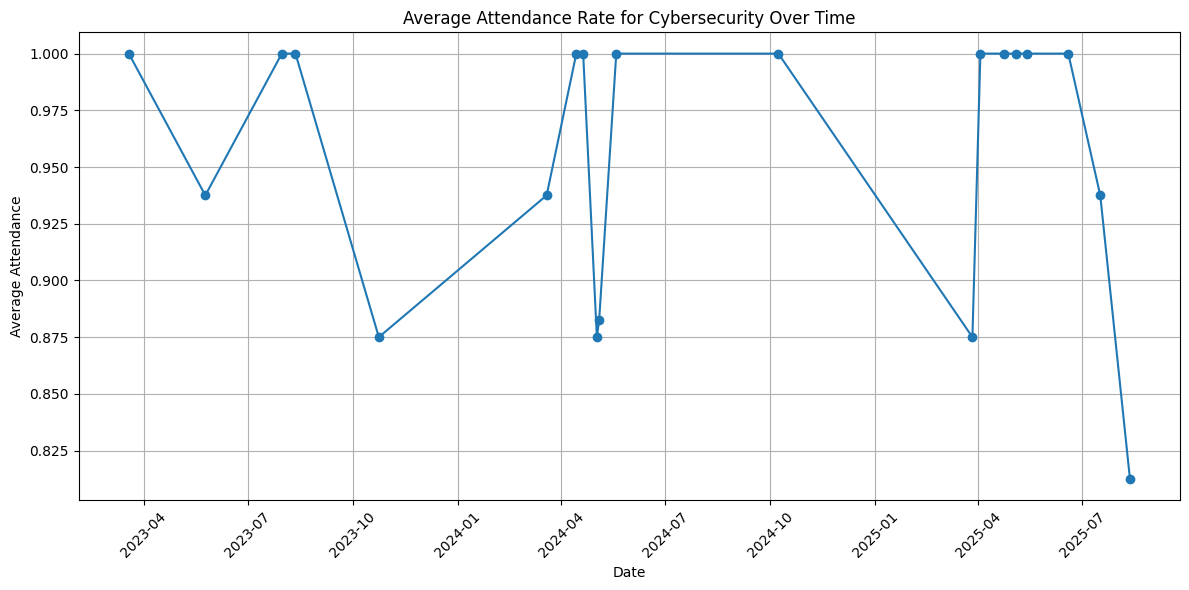

In [114]:
# Visualise Cybersecurity Module over 2023-2025
# Plot attendance rate over time
# Create a line graph (x = Date, y = the module's average attendance).

plt.figure(figsize=(12,6))
plt.plot(attendance_over_time.index, attendance_over_time.values, marker='o')
plt.title(f'Average Attendance Rate for {my_module} Over Time')
plt.xlabel('Date')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The graph shows high attendance ranging from 81% to 100%. There are periods of decline in attendance, such as October 2023 and September 2025 which recover. This could be due to the start of an academic year, reading weeks or assessment deadlines around about these times.

In [115]:
# Add a column, titled "Student Overall Attendance", with the average attendance for the student
# Average attendance for the student 
student_overall_attendance = df.groupby('Person Code')['Attended'].mean()

In [116]:
# Add column to main df
df['Student Overall Attendance'] = df['Person Code'].map(student_overall_attendance)

In [117]:
# Add a column, titled "Standardised Student Overall Attendance", with the z scores of "Student Overall Attendance"
# This score indicates standard deviation from the mean attendance so students on the extreme ends of attendance can be identified
# Calculate z scores for student overall attendance
df['Standardised Student Overall Attendance'] = zscore(df['Student Overall Attendance'])

#  Check statistics of z scores
df['Standardised Student Overall Attendance'].describe()

count    1.705300e+04
mean     1.858336e-16
std      1.000029e+00
min     -3.515625e+00
25%     -6.600172e-01
50%      1.843234e-01
75%      7.158664e-01
max      1.390828e+00
Name: Standardised Student Overall Attendance, dtype: float64

Z scores are used to standardised attendance, this will show how many standard deviations a student's attendance is from the mean and enables comparison on a common shared scale which will make it easier to compare students regardless of how many modules they are taking.

Most students have average attendance, there are extreme cases of poor attendance (z score -3.52). Students with the best attendance (z score +1.39) are only slightly above the mean.

In [118]:
# Display overall attendance and z scores
df[['Student Overall Attendance', 'Standardised Student Overall Attendance']].head()

,Student Overall Attendance,Standardised Student Overall Attendance
0,0.875000,0.777522
1,0.875000,0.777522
2,0.216216,-2.454770
3,0.216216,-2.454770
4,0.216216,-2.454770


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

I created a Shiny web app 'app.py' that displays attendance over time for any selected module.

### **Exercise 4 — Comparing Modules**


Research Question: How does attendance vary across different modules? Are there differences in attendance rates between modules?

To answer this:
- Calculate mean and standard deviation of attendance for each module
- Visualise the differences using a bar plot with 95% confidence intervals
- Observe and comment on patterns

In [119]:
# Compute mean and standard deviation of attendance per module using pandas `groupby`. Consult the documentation if needed
# Group by module using the correct column name
module_stats = df.groupby("Module Name")['Attended'].agg(['mean', 'std'])

# Rename columns to be clear
module_stats.columns = ['Mean Attendance', 'Standard Attendance']

# Reset index to make module name a column 
module_stats = module_stats.reset_index()

module_stats.head

<bound method NDFrame.head of                Module Name  Mean Attendance  Standard Attendance
0               Algorithms         0.744737             0.436200
1                   Arabic         0.752266             0.432023
2            Arts & Crafts         0.605263             0.489715
3                  Biology         0.618750             0.486454
4   Biomedical Engineering         0.650000             0.483046
5    Business Intelligence         0.782051             0.415525
6                Chemistry         0.675000             0.469027
7          Cloud Computing         0.840426             0.366406
8         Creative Writing         0.967105             0.178951
9            Cybersecurity         0.957055             0.203044
10           Data Analysis         0.466667             0.504525
11            Data Science         0.942105             0.234161
12         Database Design         0.645238             0.479012
13            Demographics         0.885714             0.31

In [120]:
# Show summary statistics for module attendance
module_stats[['Mean Attendance', 'Standard Attendance']].describe()

,Mean Attendance,Standard Attendance
count,50.000000,50.000000
mean,0.732252,0.385613
std,0.184027,0.124116
min,0.065574,0.000000
25%,0.619692,0.305537
50%,0.748501,0.429890
75%,0.884799,0.486215
max,1.000000,0.504525


The table shows mean attendance rates and standard deviation for each of the 50 modules. 

Average attendance is is 73% across modules. With a range from 7% to 100% attendance. Most modules fall between 62% and 88%.

In [121]:
# Top 5 modules with lowest attendance
module_stats.sort_values('Mean Attendance').head(5)

,Module Name,Mean Attendance,Standard Attendance
21,Graphic Design,0.065574,0.247790
45,Strategic Planning,0.436364,0.498204
10,Data Analysis,0.466667,0.504525
44,Statistics,0.485714,0.500691
47,Theater,0.521429,0.500136


In [122]:
# Top 5 highest attendance modules
module_stats.sort_values('Mean Attendance').tail(5)

,Module Name,Mean Attendance,Standard Attendance
42,Religious Studies,0.958333,0.200664
8,Creative Writing,0.967105,0.178951
16,English Literature,0.975000,0.156615
34,Nursing,0.993333,0.081650
17,Epidemiology,1.000000,0.000000


Attendance varies significantly across the 50 modules.
- 7% Graphic Design 
- 100% Epidemiology
- Average attendance of 73%

The highest performing modules achieve over 95% attendance with low standard deviation.

The lowest performing modules have below 55% attendance with high standard deviation.

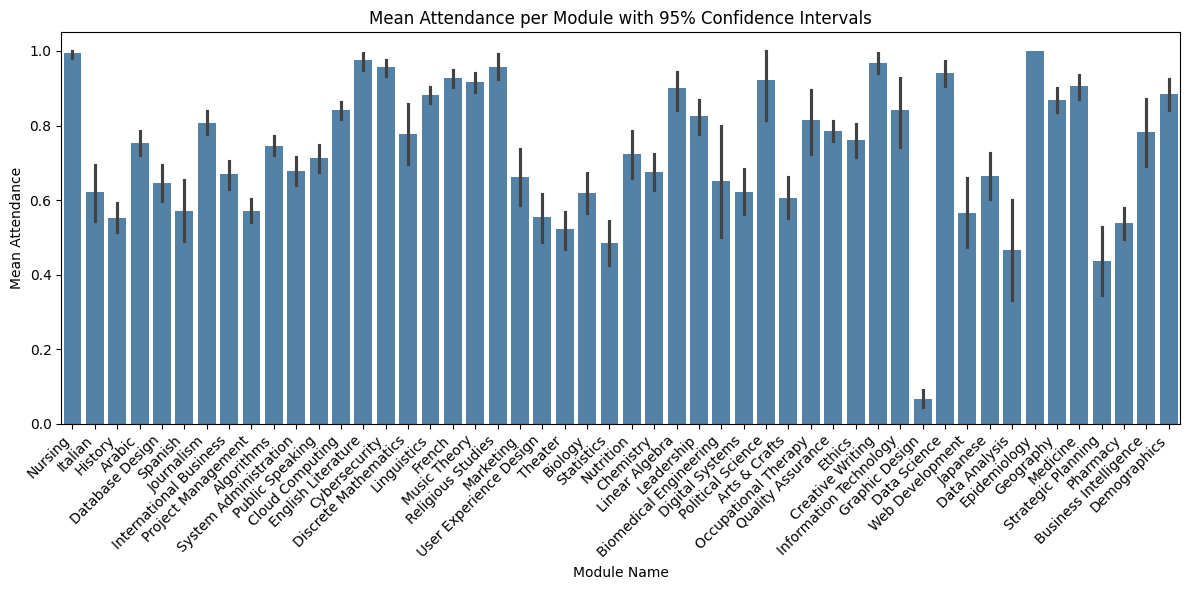

In [123]:
# Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar chart
# Each bar represents mean attendance for a module with 95% confidence intervals
sns.barplot(
    x='Module Name',
    y='Attended',
    data=df,
    errorbar= ('ci',95),  
    color='steelblue'
)

# Format plot
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Attendance")
plt.title("Mean Attendance per Module with 95% Confidence Intervals")
plt.tight_layout()
plt.show()

The barplot shows considerable variation in mean attendance across the 50 modules, ranging from approximately 7% to 100%. 

Modules such as Nursing, Epidemiology, English Literature and Data Science demonstrate the highest attendance rates >95%.

While modules like Graphic Design, Strategic Planning and Theatre show lower attendance < 55%.

The 95% intervals (error bars) show the uncertainty around each mean estimate, with wider intervals indicating greater variability in attendancepatterns within certain modules and narrower intervals suggesting more consistent attendance within those modules.

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**


Research Question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

This questione examines teh relationship between individual student behaviour - overall attendance across all their modules and attendance rates of the module.

**Approach [L6 students only]**

Run both correlation analysis and linear regression analysis to answer the same question and compare whether they tell the same story.


In [124]:
# Calculate the mean attendance rate of each module
# Reusing groupby approach from Exercise 4
module_attendance_rate = df.groupby('Module Name')['Attended'].mean()

module_attendance_rate

Module Name
Algorithms                0.744737
Arabic                    0.752266
Arts & Crafts             0.605263
Biology                   0.618750
Biomedical Engineering    0.650000
Business Intelligence     0.782051
Chemistry                 0.675000
Cloud Computing           0.840426
Creative Writing          0.967105
Cybersecurity             0.957055
Data Analysis             0.466667
Data Science              0.942105
Database Design           0.645238
Demographics              0.885714
Digital Systems           0.622807
Discrete Mathematics      0.776786
English Literature        0.975000
Epidemiology              1.000000
Ethics                    0.759887
French                    0.928205
Geography                 0.868304
Graphic Design            0.065574
History                   0.553333
Information Technology    0.842857
International Business    0.669691
Italian                   0.622517
Japanese                  0.663717
Journalism                0.807131
Leadersh

In [125]:
# Calculate the range of attendance rates across modules
module_attendance_rate.max() - module_attendance_rate.min()

np.float64(0.9344262295081968)

Module attendance rate range is 93 which demonstrates a significant variance in attendance across modules

In [126]:
# For each module, calculate the average overall attendance of the students who attended that module
# Each student's overall attendance rate is the mean of their attendance across all modules
student_overall_attendance = df.groupby('Person Code')['Attended'].mean()

student_overall_attendance

Person Code
1      0.649254
2      0.694030
3      0.928571
7      0.361702
10     0.952381
         ...   
482    0.894737
490    0.597315
491    0.964912
496    0.848276
498    0.862434
Name: Attended, Length: 174, dtype: float64

In [127]:
# For each module, calculate the average overall attendance of students in that module
# Add student overall attendance to main df
df['Student Overall Attendance'] = df['Person Code'].map(student_overall_attendance)

# For each module, calculate the average student overall attendance
average_student_attendance_per_module = df.groupby('Module Name')['Student Overall Attendance'].mean()

average_student_attendance_per_module

Module Name
Algorithms                0.710615
Arabic                    0.647835
Arts & Crafts             0.705918
Biology                   0.636538
Biomedical Engineering    0.701747
Business Intelligence     0.742438
Chemistry                 0.691338
Cloud Computing           0.720388
Creative Writing          0.826032
Cybersecurity             0.931278
Data Analysis             0.789046
Data Science              0.921174
Database Design           0.655098
Demographics              0.885714
Digital Systems           0.717758
Discrete Mathematics      0.933114
English Literature        0.933114
Epidemiology              0.789046
Ethics                    0.685973
French                    0.879215
Geography                 0.886259
Graphic Design            0.147825
History                   0.639957
Information Technology    0.836740
International Business    0.727192
Italian                   0.788236
Japanese                  0.730417
Journalism                0.711797
Leadersh

The average overall attendance of students enrolled in a particular module enables an evaluation of whether modules with low attendance may correlate to students with low attendance

In [128]:
# Combine module attendance rate with average student overall attendance
combined_attendance = pd.DataFrame({
    'Module Attendance Rate': module_attendance_rate,
    'Average Student Overall Attendance': average_student_attendance_per_module
})

# Remove any missing values 
combined_attendance = combined_attendance.dropna()

combined_attendance

,Module Attendance Rate,Average Student Overall Attendance
Module Name,,
Algorithms,0.744737,0.710615
Arabic,0.752266,0.647835
Arts & Crafts,0.605263,0.705918
Biology,0.618750,0.636538
Biomedical Engineering,0.650000,0.701747
Business Intelligence,0.782051,0.742438
Chemistry,0.675000,0.691338
Cloud Computing,0.840426,0.720388
Creative Writing,0.967105,0.826032


The combined_attendance dataframe contains 50 modules with two variables - Module Attendance Rate (% of students that attend this module)
- Average Student overall Attendance (average overall attendance of students in this module)

In [129]:
# Correlation analysis 

# Variables 
x = combined_attendance['Average Student Overall Attendance']
y = combined_attendance['Module Attendance Rate']

# Calculate Perarson correlation coefficient and p value 
r, p = pearsonr(x,y)

print(f"Correlation coefficient: {r}")
print(f"P-value: {p}")


Correlation coefficient: 0.682846152238247
P-value: 4.6863158878295244e-08


Method Selection:
Correlation Analysis (Pearson's r)
- Appropriate because both variables are continuous
- The relationship appears linear 
- Variables are normally distributed ath the module level

Interpretation of results:
r = 0.683 - there is a positive linear relationship, students with low overall attendance do tend to go to modules with low attendance. However, students with high overall attendance tend to go to modules with high attendance.

P < 0.001 - this is highly significant, the relationship is not by chance. There is evidence of a relationship with overall attendance and attendance.

This analysis demonstrates suggest there is a positive relationship between the two variables.

In [130]:
# Linear regression
# Main statistic and p-value(s

import statsmodels.api as sm

# x and y have previously are defined 
# x = combined_attendance['Average Student Overall Attendance'] independent variable
# y = combined_attendance['Module Attendance Rate'] dependent variable

# Fit OLS regression model 
model = sm.OLS(y, sm.add_constant(x)).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Module Attendance Rate   R-squared:                       0.466
Model:                                OLS   Adj. R-squared:                  0.455
Method:                     Least Squares   F-statistic:                     41.93
Date:                    Sun, 16 Nov 2025   Prob (F-statistic):           4.69e-08
Time:                            00:55:56   Log-Likelihood:                 29.889
No. Observations:                      50   AIC:                            -55.78
Df Residuals:                          48   BIC:                            -51.95
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

 Method Selection:
 Linear Regression (OLS):
 - Allow the quantification of the relationship
 - OLS provides a predictive model, so from student attendance you can predict module attendance
 - OLS is the standard method for linear relationships

 Interpretation of results:
 The model explains 46.6% of the variance in module attendance rates, suggesting that student attendance patterns are a substantial factor in determining which modules have high or low attendance.

The linear regression analysis shows:

1) Slope = 0.989, p <0.001
There is almost a 1:1 relationship between these two variables. Showing a proportional relationship.

2) R-squared = 0.466
The model explains 46% of the variance in module attendance rates.
This means student attendance is a significant factor for the outcome module attendance.

### Do Correlation and Regression Tell the Same Story?

Yes both analyses tell the same story and complementary evidence

1) The correlation coefficient and its sqaure match r squared from the linear regression.
- Correlation coefficient squared = 0.466
- Linear regression r squared = 0.466

This means they are both measuring the same relationship

2) Both analyses show the same p value 
<0.001, which indicates that the relationship is statistically significant


3) The positive correlation (r = 0.683) aligns with the positive slope (slope =0.989). This indicates students with low attendance do attend modules with low attendance rates

The regression shows the relationship is almost proportional between the two variables. The correlation shows the strength and direction of the relationship.

Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**

To conclude: there is a strong positive and significant relationship between student overall attendance and the attendance rates of the modules they attend.

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!